In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB


In [8]:
Dataset = pd.read_csv('Churn_Modelling.csv')
Dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [9]:
print(Dataset.isnull().sum())
len(Dataset)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


10002

In [11]:
Dataset1 = Dataset.dropna()
Dataset1 = Dataset1.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


(array(['France', 'Germany', 'Spain'], dtype=object), array([5012, 2510, 2476], dtype=int64))


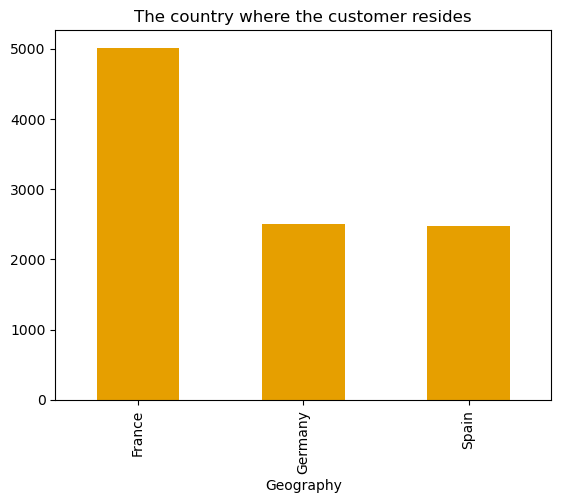

(array(['Female', 'Male'], dtype=object), array([4543, 5455], dtype=int64))


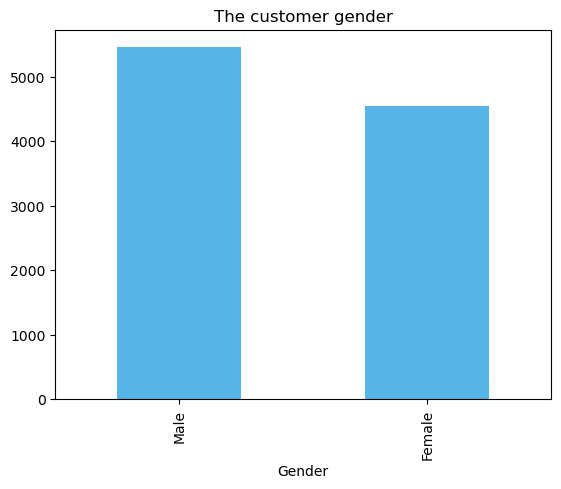

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([ 413, 1035, 1046, 1010,  989, 1012,  967, 1027, 1025,  984,  490],
      dtype=int64))


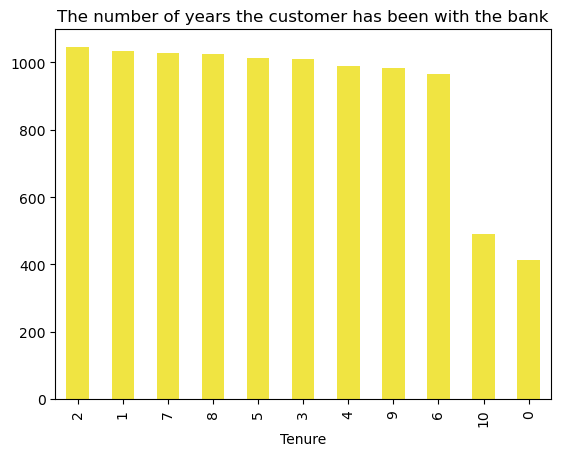

(array([1, 2, 3, 4], dtype=int64), array([5083, 4589,  266,   60], dtype=int64))


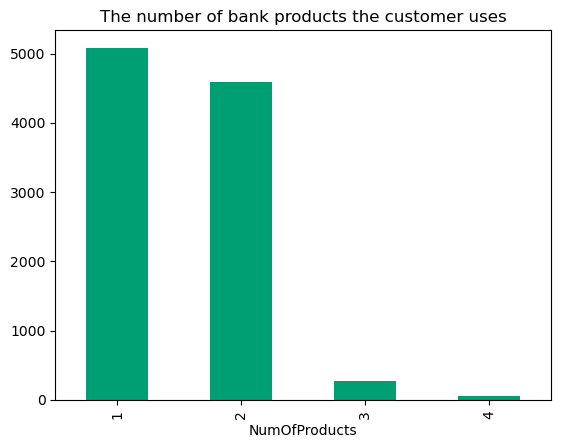

(array([0., 1.]), array([2944, 7054], dtype=int64))


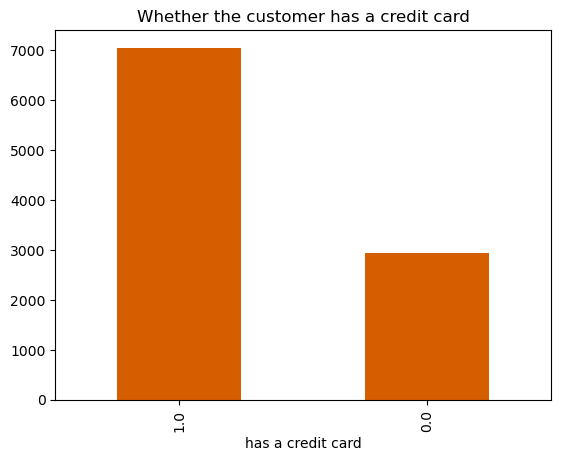

(array([0., 1.]), array([4851, 5147], dtype=int64))


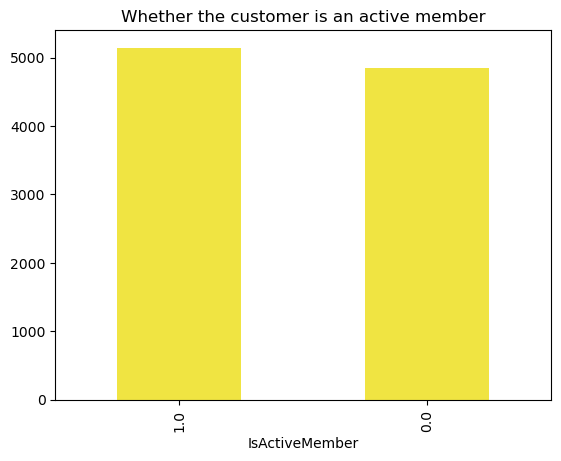

(array([0, 1], dtype=int64), array([7960, 2038], dtype=int64))


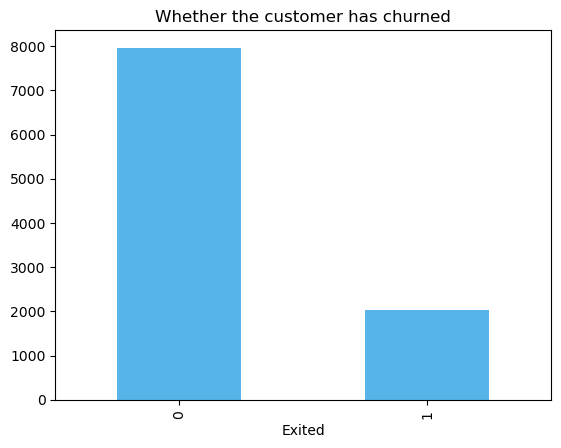

In [6]:
print(np.unique(Dataset1['Geography'],  return_counts=True))
plt.xlabel('Geography')
plt.title('The country where the customer resides')
Dataset1['Geography'].value_counts().plot(kind='bar', color = '#E69F00')
plt.show()

print(np.unique(Dataset1['Gender'],  return_counts=True))
plt.xlabel('Gender')
plt.title('The customer gender')
Dataset1['Gender'].value_counts().plot(kind='bar', color = '#56B4E9')
plt.show()

print(np.unique(Dataset1['Tenure'],  return_counts=True))
plt.xlabel('Tenure')
plt.title('The number of years the customer has been with the bank')
Dataset1['Tenure'].value_counts().plot(kind='bar', color = '#F0E442')
plt.show()

print(np.unique(Dataset1['NumOfProducts'],  return_counts=True))
plt.xlabel('NumOfProducts')
plt.title('The number of bank products the customer uses')
Dataset1['NumOfProducts'].value_counts().plot(kind='bar', color = '#009E73')
plt.show()

print(np.unique(Dataset1['HasCrCard'],  return_counts=True))
plt.xlabel('has a credit card')
plt.title('Whether the customer has a credit card')
Dataset1['HasCrCard'].value_counts().plot(kind='bar', color = '#D55E00')
plt.show()

print(np.unique(Dataset1['IsActiveMember'],  return_counts=True))
plt.xlabel('IsActiveMember')
plt.title('Whether the customer is an active member')
Dataset1['IsActiveMember'].value_counts().plot(kind='bar', color = '#F0E442')
plt.show()

print(np.unique(Dataset1['Exited'],  return_counts=True))
plt.xlabel('Exited')
plt.title('Whether the customer has churned')
Dataset1['Exited'].value_counts().plot(kind='bar', color = '#56B4E9')
plt.show()

CreditScore
350
650.53
850


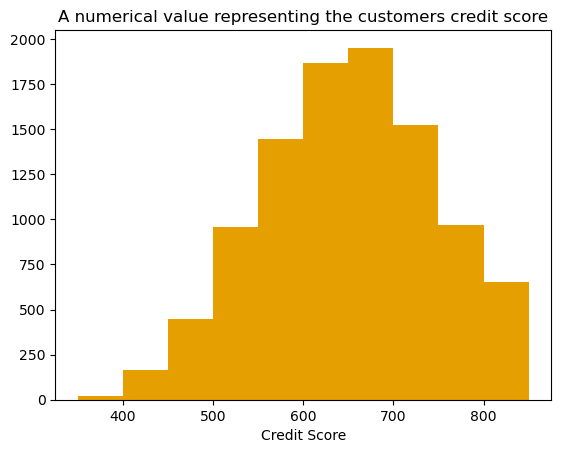

Age
18.0
38.92
92.0


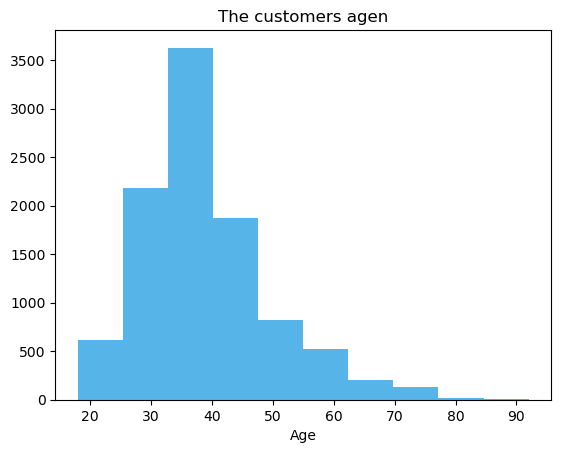

Balance
0.0
76481.49
250898.09


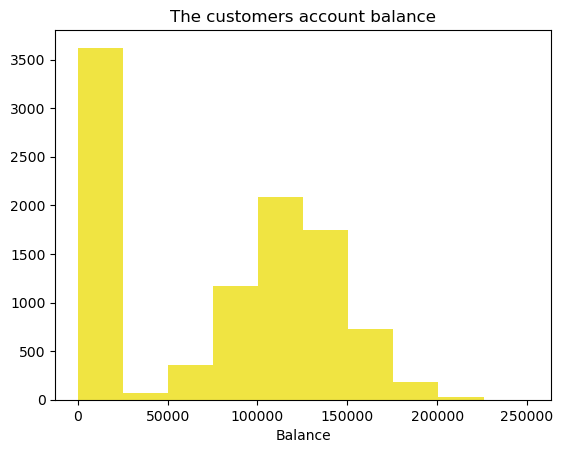

EstimatedSalary
11.58
100099.79
199992.48


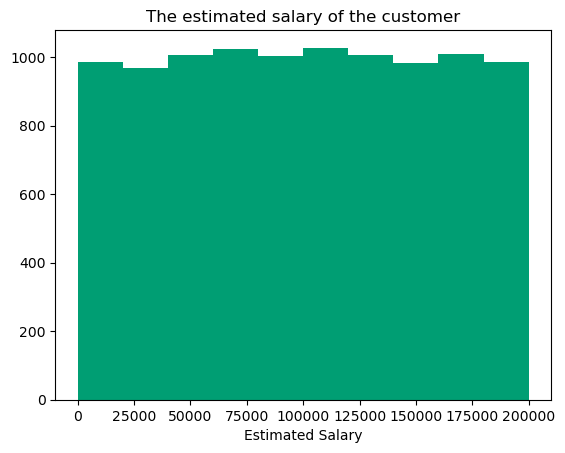

In [39]:
print(Dataset1.columns[0])
print(min(Dataset1['CreditScore']))
print(np.mean(Dataset1['CreditScore']).round(2))
print(max(Dataset1['CreditScore']))
plt.hist(Dataset1['CreditScore'], color = '#E69F00')
plt.xlabel('Credit Score')
plt.title('A numerical value representing the customers credit score')
plt.show()

print(Dataset1.columns[3])
print(min(Dataset1['Age']))
print(np.mean(Dataset1['Age']).round(2))
print(max(Dataset1['Age']))
plt.hist(Dataset1['Age'], color = '#56B4E9')
plt.xlabel('Age')
plt.title('The customers agen')
plt.show()

print(Dataset1.columns[5])
print(min(Dataset1['Balance']))
print(np.mean(Dataset1['Balance']).round(2))
print(max(Dataset1['Balance']))
plt.hist(Dataset1['Balance'], color = '#F0E442')
plt.xlabel('Balance')
plt.title('The customers account balance')
plt.show()

print(Dataset1.columns[9])
print(min(Dataset1['EstimatedSalary']))
print(np.mean(Dataset1['EstimatedSalary']).round(2))
print(max(Dataset1['EstimatedSalary']))
plt.hist(Dataset1['EstimatedSalary'], color = '#009E73')
plt.xlabel('Estimated Salary')
plt.title('The estimated salary of the customer')
plt.show()


In [12]:
Dataset2 = Dataset1


In [13]:
#Discretization


Dataset1['Geography']=Dataset1['Geography'].replace(['France', 'Germany', 'Spain'],[1, 2, 3])
Dataset1['Gender']=Dataset1['Gender'].replace(['Female', 'Male'],[1, 2])
bin0 = [-1, 500, 600, 700, 10000]
bin4 = [-1, 20, 30, 40, 50, 150]
bin6 = [-1, 50000, 100000, 150000, 1000000]

Label1 = [1, 2, 3, 4]
Label2 = [1, 2, 3, 4, 5]
Dataset1["CreditScore"] = pd.cut(Dataset1["CreditScore"], bin0, labels = Label1).astype('int64')
Dataset1["Age"] = pd.cut(Dataset1["Age"], bin4, labels = Label2).astype('int64')
Dataset1["Balance"] = pd.cut(Dataset1["Balance"], bin6, labels = Label1).astype('int64')
Dataset1["EstimatedSalary"] = pd.cut(Dataset1["EstimatedSalary"], bin6, labels = Label1).astype('int64')
Dataset1.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance              int64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary      int64
Exited               int64
dtype: object

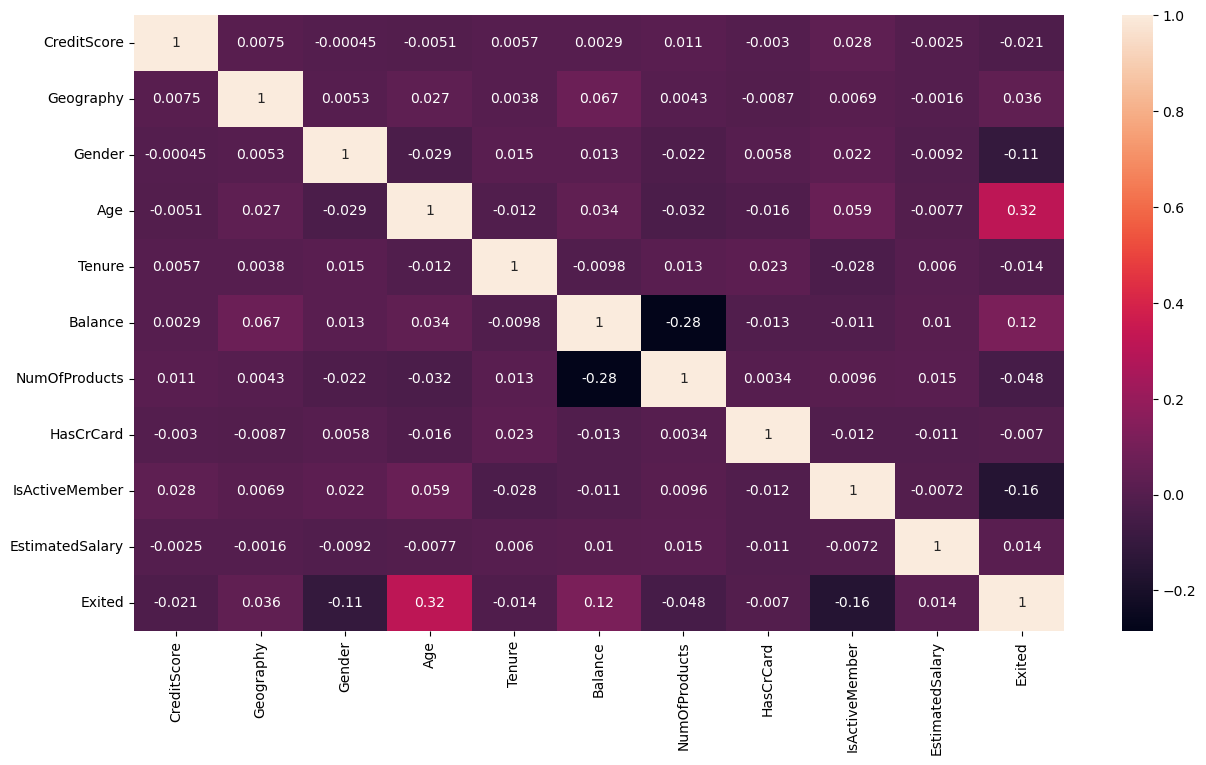

In [14]:
plt.figure(figsize= (15, 8))
x = sns.heatmap(Dataset1.corr(), annot = True)


In [15]:
Dataset1 = Dataset1.drop(['HasCrCard'], axis=1)
Dataset1.shape

(9998, 10)

In [23]:

#Convert Type of attribute
col_names = Dataset1.columns
for col in col_names:   
    Dataset1[col] = Dataset1[col].astype('category',copy=False)

print(Dataset1.dtypes)

CreditScore        category
Geography          category
Gender             category
Age                category
Tenure             category
Balance            category
NumOfProducts      category
IsActiveMember     category
EstimatedSalary    category
Exited             category
dtype: object


In [24]:
#Decision Tree

X = Dataset1.drop('Exited', axis=1)
y = Dataset1['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2081  304]
 [ 326  289]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2385
           1       0.49      0.47      0.48       615

    accuracy                           0.79      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.79      0.79      0.79      3000



In [25]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_nb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test, y_nb_pred))
print(classification_report(y_test, y_nb_pred))

[[2346   39]
 [ 420  195]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2385
           1       0.83      0.32      0.46       615

    accuracy                           0.85      3000
   macro avg       0.84      0.65      0.69      3000
weighted avg       0.85      0.85      0.82      3000



In [26]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
svm_Predict = clf.predict(X_test)
print(confusion_matrix(y_test, svm_Predict))
print(classification_report(y_test, svm_Predict))

[[2379    6]
 [ 513  102]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2385
           1       0.94      0.17      0.28       615

    accuracy                           0.83      3000
   macro avg       0.88      0.58      0.59      3000
weighted avg       0.85      0.83      0.77      3000



In [27]:
#Knn Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_Predict = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2081  304]
 [ 326  289]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2385
           1       0.49      0.47      0.48       615

    accuracy                           0.79      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.79      0.79      0.79      3000

